# FIT1043 Introduction To Data Science  Assignment 2

__Aayan Khan <br>
Student ID: 31486347__

## Question 1: Decision Tree and Random Forest Classifier

### Question 1.1) Introduction

### a) Introduction

Throughout this question, we use numerical and categorical data about loans from a lender to find relations between the features such as their credit score, annual income, credit policy criteria and the target variable of the borrower's ability to pay the full loan back. To do this, we train a decision tree classifier as well as a random forest model which we ultimately evaluate using the confusion matrix. We also compare these models against each other to determine which model appears to be a better fit for our purpose.

### b) Importing Data and Data Description

Firstly, the pandas library is imported as it allows to read csv files and work with them using the DataFrame structure along with its functions. Then the matplotlib.pyplot library is imported as it allows to plot several different types of graphs.
The pd.read_csv() command is used to read the csv files from the data folder in the same directory as the workbook. It also puts the csv files in a dataframe format.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

df_loan = pd.read_csv("loan_data.csv")

As we can see below, there are 13 variables in our dataset with the first 12 variables being our independent variables and the 13-th variable (not.fully.paid) being the dependent variable and the one we are trying to predict. We have a mix of categorical and numerical independent variables:
<br>Categorical: credit.policy, inq.last.6mths, delinq.2yrs, pub.rec 
<br>Numerical:    int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util
<br>And our dependent variable of not.fully.paid is also a categorical variable

We can see that there are 9578 seperate instances present in our dataset

In [31]:
df_loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [32]:
df_loan.shape

(9578, 13)

In [33]:
df_loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### c) Histogram of Not Fully Paid Per Their fico score

To plot this histogram, we simply create two dataframes for each different outcome of the not.fully.paid variable. Then we can plot these as histograms using the matplotlib.pyplot library

In [34]:
not_paid = df_loan[df_loan['not.fully.paid'] == 1]['fico']
paid = df_loan[df_loan['not.fully.paid'] == 0]['fico']

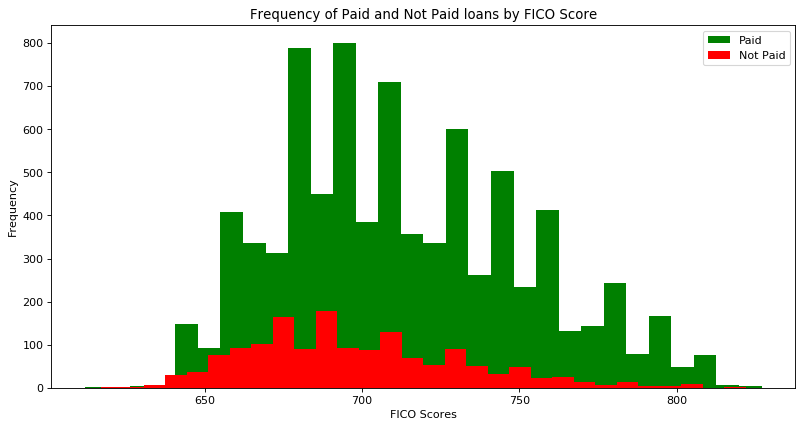

In [35]:
figure(figsize=(12, 6), dpi=80)

num_bins = 30

#Plotting paid histogram
plt.hist(paid, bins = num_bins, color = 'green', label = 'Paid')

#Plotting not_paid histogram
plt.hist(not_paid, bins = num_bins, color = 'red', label = 'Not Paid')

#Creating Legends
plt.legend()

plt.xlabel("FICO Scores")
plt.ylabel("Frequency")
plt.title("Frequency of Paid and Not Paid loans by FICO Score")
plt.show()

### d) Plot For FICO vs Interest Rate

To show the relationship between the FICO score and interest rates, we can group the data together by the FICO scores and then calculate the mean interest rate that is provided for each FICO score. This allows us to plot a line graph of the mean interest rates against the FICO score

In [36]:
interest_rate = df_loan['int.rate']
fico = df_loan['fico']

Text(0.5, 1.0, 'FICO Score vs Mean Interest Rate')

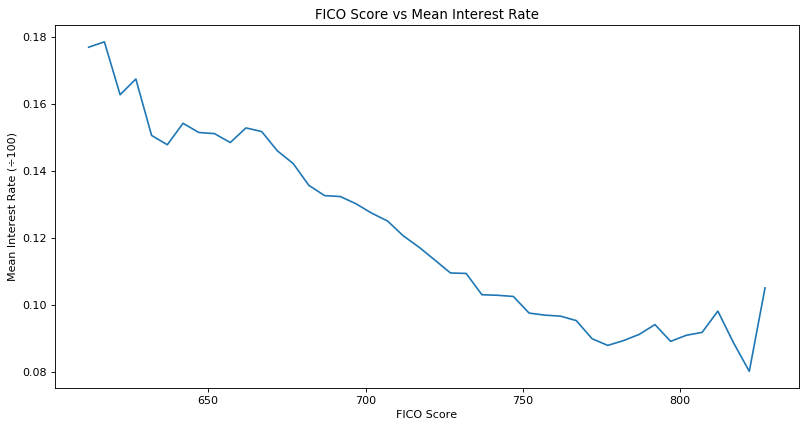

In [37]:
data = df_loan[['fico', 'int.rate']]
groupbyclass = data.groupby("fico").agg('mean')

figure(figsize=(12, 6), dpi=80)

plt.plot(groupbyclass)

plt.xlabel("FICO Score")
plt.ylabel("Mean Interest Rate (÷100)")
plt.title("FICO Score vs Mean Interest Rate")

### Question 1.2) Supervised Learning

### a) Explain supervised machine learning, the notion of labelled data, and the training and test datasets

Supervised machine learning uses data where all the columns represent different variables and rows represent each data point and the algorithms aim to infer the dependent variable from the independent variables. The goal is to approximate a function such that the independent variables can be used to predict the value of the dependent variable.

Labelled data means that each different column/variable in the dataset has a label that defines some characteristic of the variable. For example, some variables could be labelled as independent variables and the last variable could be labelled as a dependent variable

Training datasets and testing datasets are usually derived from a parent dataset that contains the data that we are interested in. We use the training dataset to train our data model whereas we use the testing dataset to test the performance of our data model by comparing the predicted value of the dependent variable by the model against the actual value. We use separate data for training and testing our models as it allows us to test the model's ability to predict the target variable using new values for the independent variables

### b) Separating Features and Label

In this case, our features are the first 11 columns in the dataset while our label is the not.fully.paid variable which is the 12-th column in our dataset.
We simply use the pandas iloc function to separate the features and label into separate dataframes

In [38]:
df_features = df_loan.iloc[: , 0:12]
df_features.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [39]:
df_label = df_loan['not.fully.paid']
df_label.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

### c) Train and Test Split

To split our dataset, we simply use the train_test_split() function from the sklearn.model_selection library which returns the input dataset as separate training and testing datasets to be used for model training and model testing. This function also shuffles the data in a pseudorandom but repeatable manner using the random_state variable value. 

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_features, df_label, test_size = 0.20, random_state = 0)

### Question 1.3) Classification

### a) Explain the difference between binary and multi-class classification and point what type of classification is your current problem

Binary classification is when our model classifies our target variable into 2 classes such as a 1 and a 0. Multi-class classification is when our model classifies our target variable into more than 2 classes such as a, b, c or d.

Our current problem is a binary classification problem as we only need to predict whether a loan was fully paid back or not which are 0 and 1 respectively

### b) Training a Decision Tree and a Random Forest Model

To train a decision tree classifier model, we use the sklearn.tree library. Then we use the DecisionTreeClassifier() class from the library to create a new model with our supplied criterion, which is entropy in our case (this measures the quality of the split in our model). Then we finally use this model's fit function to train the model on our training dataset

To train a random forest classifier model, we use the sklearn.ensemble library. Then we use the RandomForestClassifier() class from the library to create a new model with our supplied criterion, which is entropy in our case (this measures the quality of the split in our model). Then we finally use this model's fit function to train the model on our training dataset

__Decision Tree Classifier__

In [41]:
#Training model
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

__Random Forest Classifier__

In [42]:
#Training model
random_forest_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### c) Prediction Using The Trained Models and Confusion Matrix

To predict on the testing dataset, we simply use the predict function for both the trained models. Then we use the confusion matrix from the sklearn.metrics library to produce a confusion matrix for our data

__Decision Tree Classifier__

In this confusion matrix, the top left value of 1378 represents the True Negatives which are the correctly predicted loans that were fully paid (not.fully.paid=0 and model also predicted 0). 

The top right value of 237 represents the False Positives which are the values that were wrongly predicted by our model to not be fully paid (not.fully.paid=0 and model predicted 1).

The bottom left value of 221 represents the False Negatives which are the values that were wrongly predicted by our model to be fully paid (not.fully.paid=1 and model predicted 0).

The bottom right value of 80 represents the True Positives which are the values that were correctly predicted by our model to not be fully paid (not.fully.paid=1 and model predicted 1). 

In [43]:
#Predicting using model on testing dataset
y_pred_decision_tree = decision_tree_classifier.predict(x_test)

#creating a confusion matrix
cm = confusion_matrix(y_test, y_pred_decision_tree)
cm

array([[1378,  237],
       [ 221,   80]], dtype=int64)

__Random Forest Classifier__

In this confusion matrix, the top left value of 1599 represents the True Negatives which are the correctly predicted loans that were fully paid (not.fully.paid=0 and model also predicted 0). 

The top right value of 16 represents the False Positives which are the values that were wrongly predicted by our model to not be fully paid (not.fully.paid=0 and model predicted 1).

The bottom left value of 291 represents the False Negatives which are the values that were wrongly predicted by our model to be fully paid (not.fully.paid=1 and model predicted 0).

The bottom right value of 10 represents the True Positives which are the values that were correctly predicted by our model to not be fully paid (not.fully.paid=1 and model predicted 1). 

In [44]:
#Predicting using model on testing dataset
y_pred_random_forest = random_forest_classifier.predict(x_test)

#creating a confusion matrix
cm = confusion_matrix(y_test, y_pred_random_forest)
cm

array([[1599,   16],
       [ 291,   10]], dtype=int64)

### Question 1.4) Conclusion

The better performing model in this case is the random forest classifier as it has a total of 307 wrongly predicted values in the form of 16 false positives and 291 false negatives. These are significantly less wrongly predicted values compared to the decision tree classifier which has a total of 458 wrongly predicted values in the form of 237 false positives and 221 false negatives.

Throughout this question, we have used data about loans to train a decision tree classifier as well as a random forest classifier to ultimately try to predict the target variable of not.fully.paid which represents whether a loaner paid the loan back fully. 

This ultimately gives us an insight into the use of data models in real life and how companies can use them to issue loans that are more likely to be paid back. 

## Question 2: 

### Question 2.1) Introduction

### a) Introduction to assignment

Throughout this question, we use data about customers from a store to find relations between the features such as the time spent on their app or website and target variable of "Yearly Amount Spent". To do this, we train a linear regression model which we ultimately evaluate using metrics such as the mean squared error and the coefficient of determination. We also plot several graphs to gain a visual understanding of the relations between variables.

### b) Importing Data and Data Description

Firstly, the pandas library is imported as it allows to read csv files and work with them using the DataFrame structure along with its functions. Then the matplotlib.pyplot library is imported as it allows to plot several different types of graphs.
The pd.read_csv() command is used to read the csv files from the data folder in the same directory as the workbook. It also puts the csv files in a dataframe format.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df_customer = pd.read_csv("customers-shop.csv")

As we can see below, there are 6 variables in our dataset with the first 5 variables being our independent variables and the 6-th variable (Yearly Amount Spent) being the dependent variable and the one we are trying to predict. 

We have 5 numerical variables: Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent. 

And 1 categorical variable: Customer info-color Avatar

<br> We can see that there are 500 seperate instances present in our dataset

In [46]:
df_customer.head()

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [47]:
df_customer.shape

(500, 6)

In [48]:
df_customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### c) Scatter Plot For Time on Website and Yearly Amount Spent

This scatter plot seems to show almost no correlation between the amount of time spent on the website and the yearly amount spend.
Initially, the correlation does not make sense as we would expect customers that spend more time on the website to spend more money throughout the year but this does not seem to be the case when looking at the graph.

Text(0.5, 1.0, 'Time on Website vs Yearly Amount Spent')

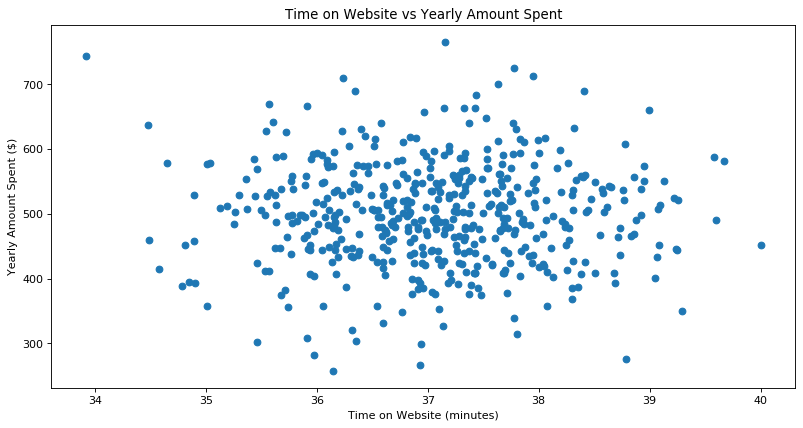

In [49]:
figure(figsize=(12, 6), dpi=80)

plt.scatter(df_customer['Time on Website'], df_customer['Yearly Amount Spent'])

plt.xlabel("Time on Website (minutes)")
plt.ylabel("Yearly Amount Spent ($)")
plt.title("Time on Website vs Yearly Amount Spent")

### d) Scatter Plot For Time on App and Yearly Amount Spent

This scatter plot seems to show a positive correlation between the amount of time spent on the website and the yearly amount spent.
This correlation makes much more sense than part c as we expect customers to spend more money if they spend more time on the app. 

Text(0.5, 1.0, 'Time on App vs Yearly Amount Spent')

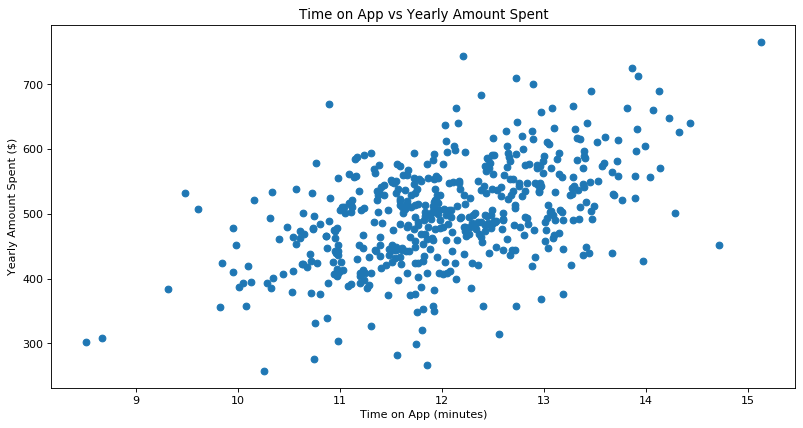

In [50]:
figure(figsize=(12, 6), dpi=80)

plt.scatter(df_customer['Time on App'], df_customer['Yearly Amount Spent'])

plt.xlabel("Time on App (minutes)")
plt.ylabel("Yearly Amount Spent ($)")
plt.title("Time on App vs Yearly Amount Spent")

### Question 2.2) Supervised Learning

### a) Separate the features and the label and mention what is your label

In this case, our features are the second column to the fifth column in the dataset while our label is the Yearly Amount Spent variable which is the 6-th column in our dataset.
We simply use the pandas iloc function to separate the features and label into separate dataframes.
We do not use the Customer info-color Avatar as a feature as it is of no use to use in predicting the Yearly amount spent as the Avatar of a customer has no effect on their spending.

In [51]:
df_features = df_customer.iloc[: , 1:5]
df_features.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [52]:
df_label = df_customer['Yearly Amount Spent']
df_label.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

### b) Train and Test Split

To split our dataset, we simply use the train_test_split() function from the sklearn.model_selection library which returns the input dataset as separate training and testing datasets to be used for model training and model testing. This function also shuffles the data in a pseudorandom but repeatable manner using the random_state variable value. 

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df_features, df_label, test_size = 0.30, random_state = 0)

### Question 2.3) Regression

### a) Training Linear Regression Model

To train a linear regression model, we use the sklearn.linear_model library. Then we use the LinearRegression() class from the library to create a new model. Then we finally use this model's fit function to train the model on our training dataset.

To show the coefficients of the linear regression model, we simply use the regression.coef_ function

__Training Model__

In [54]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Coefficients of Regression Model__

In [55]:
for i in range(len(df_features.columns)):
        print(str(df_features.columns[i]) + ': ' + str(linear_regression.coef_[i]))

Avg. Session Length: 25.767529672487093
Time on App: 38.80039355752906
Time on Website: -0.018040931399572413
Length of Membership: 61.85256791142481


### b) Prediction Using Trained Model and Accuracy Metrics

To predict on the testing dataset, we simply use the predict function for the regression model.

For the accuracy metrics, we use the mean_squared error from the sklearn.metrics library.

The mean squared error for our data is only 94.56 from our testing of the model which very low and thus a good thing as it means that our model is able to closely predict the target variable of 'yearly amount spent' using the provided independent variables.

The r^2 value is also very high at 0.98 which means that 98% of the variation in our 'yearly amount spent' can be explained using the provided independent variables. It also points to a strong correlation between our independent variables and our target variable.



__Predicting Using Model__

In [56]:
#Predicting using model on testing dataset
y_pred_linear_regression = linear_regression.predict(x_test)

__Generating Mean Squared Error__

In [57]:
mse = mean_squared_error(y_test, y_pred_linear_regression)
print('Mean Squared Error :' + str(mse))

Mean Squared Error :94.55779503639958


__Generating Coefficient of Determination (r^2) Value__

In [58]:
coefficient_determination = r2_score(y_test, y_pred_linear_regression)
print('Coefficient of Determination (r^2): ' + str(coefficient_determination))

Coefficient of Determination (r^2): 0.9849262666981959


### Question 4a) Conclusion

The 'Time on App' variable is much more important than the 'Time on Website' variable for increasing the yearly-amount-spent as the coefficient in the linear regression model for the 'Time on App' variable is 38.80 meaning that a unit increase in this variable results in us gaining \\$38.80 in yearly-amount-spent. This is much higher in comparison to the coefficient for the 'Time on Website' variable which is -0.02 meaning that a unit increase in this variable results in us losing \\$0.02 in yearly-amount-spent. Thus, it is much more important for the company to focus their efforts on their mobile app over their website. 

Throughout this question, we have used data about customers to train a linear regression model to ultimately try to predict the target variable of Yearly Amount Spent which represents the amount of money a customer would spend with the business over a year. This also led to us in exploring which variables had the highest impact on sales and thus focus on improving them further. 

This ultimately gives us an insight into the use of data models in real life and how companies can use them to make decisions that are best for their businesses. 